<a href="https://colab.research.google.com/github/gpriya32/EDA-and-Classification/blob/master/EDA_%26%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#viz
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import plotly.express as px


# # graph viz
# import plotly.offline as pyo
# from plotly.graph_objs import *
# import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

#settings
color = sns.color_palette()
sns.set_style("dark")
# pyo.init_notebook_mode()



In [111]:
%matplotlib inline 

In [112]:
df=pd.read_csv('/content/drive/My Drive/DATASETS/Customers2.csv')

#EDA

In [113]:
df

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,German,Canada,0.0,0.0,No,Yes
749,750,0,4,0,0,0,German,Canada,0.0,0.0,No,Yes
750,751,15,0,0,0,0,English,India,0.0,0.0,No,Yes
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,Yes,Yes


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     753 non-null    int64  
 1   NumCalls       753 non-null    int64  
 2   NumEmails      753 non-null    int64  
 3   NumDownloads   753 non-null    int64  
 4   NumEvents      753 non-null    int64  
 5   NumForms       753 non-null    int64  
 6   Language       753 non-null    object 
 7   Country        753 non-null    object 
 8   WebVisits      739 non-null    float64
 9   PageVisits     739 non-null    float64
 10  PriorClient    753 non-null    object 
 11  MadeAPurchase  753 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 70.7+ KB


In [115]:
df.isnull().sum()

CustomerID        0
NumCalls          0
NumEmails         0
NumDownloads      0
NumEvents         0
NumForms          0
Language          0
Country           0
WebVisits        14
PageVisits       14
PriorClient       0
MadeAPurchase     0
dtype: int64

In [116]:
df.shape

(753, 12)

In [117]:
df.loc[df['PageVisits'].isnull()]

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
54,55,0,3,0,0,0,Chinese,China,NaN,NaN,Yes,Yes
55,56,0,0,2,1,0,English,Switzerland,NaN,NaN,Yes,No
56,57,3,0,0,0,0,Spanish,Chile,NaN,NaN,No,Yes
57,58,24,0,2,2,0,Italian,Italy,NaN,NaN,Yes,Yes
58,59,0,0,0,2,0,Japanese,Japan,NaN,NaN,Yes,No
59,60,0,8,0,0,0,English,USA,NaN,NaN,Yes,Yes
60,61,1,0,0,0,0,Spanish,Colombia,NaN,NaN,Yes,Yes
61,62,0,0,0,1,1,German,Germany,NaN,NaN,Yes,No
62,63,10,6,0,0,0,German,Switzerland,NaN,NaN,Yes,Yes
63,64,32,0,2,2,0,Portuguese,Portugal,NaN,NaN,Yes,Yes


In [118]:
df.fillna(0,inplace=True)

In [119]:
df.isnull().sum()

CustomerID       0
NumCalls         0
NumEmails        0
NumDownloads     0
NumEvents        0
NumForms         0
Language         0
Country          0
WebVisits        0
PageVisits       0
PriorClient      0
MadeAPurchase    0
dtype: int64

In [120]:
df.corr()

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,WebVisits,PageVisits
CustomerID,1.000000,0.009318,-0.060885,-0.043302,-0.018588,-0.027367,-0.322985,-0.241026
NumCalls,0.009318,1.000000,-0.024605,-0.076742,-0.160997,0.020944,0.028609,-0.022931
NumEmails,-0.060885,-0.024605,1.000000,0.101145,0.144024,0.139552,0.050507,-0.012449
NumDownloads,-0.043302,-0.076742,0.101145,1.000000,0.268271,0.099275,-0.000883,-0.037804
NumEvents,-0.018588,-0.160997,0.144024,0.268271,1.000000,0.314650,-0.016813,-0.014074
NumForms,-0.027367,0.020944,0.139552,0.099275,0.314650,1.000000,-0.040293,-0.005587
WebVisits,-0.322985,0.028609,0.050507,-0.000883,-0.016813,-0.040293,1.000000,0.091758
PageVisits,-0.241026,-0.022931,-0.012449,-0.037804,-0.014074,-0.005587,0.091758,1.000000


In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['PriorClient']=le.fit_transform(df['PriorClient'])
df['MadeAPurchase']=le.fit_transform(df['MadeAPurchase'])
df

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,1,0
1,2,0,1,0,1,0,English,USA,61.0,0.0,0,0
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,0,0
3,4,0,10,0,0,1,English,India,26.0,0.0,0,0
4,5,7,0,0,0,0,English,USA,11.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,German,Canada,0.0,0.0,0,1
749,750,0,4,0,0,0,German,Canada,0.0,0.0,0,1
750,751,15,0,0,0,0,English,India,0.0,0.0,0,1
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,1,1


In [122]:
train_df=df.iloc[:, :-1]

In [123]:
test_df=df.iloc[:,11]

In [124]:

print('train shape : ',train_df.shape,'\n','test shape',test_df.shape)


train shape :  (753, 11) 
 test shape (753,)


In [125]:
dataframe=train_df
train_df

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient
0,1,33,19,1,0,1,German,Germany,10.0,0.0,1
1,2,0,1,0,1,0,English,USA,61.0,0.0,0
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,0
3,4,0,10,0,0,1,English,India,26.0,0.0,0
4,5,7,0,0,0,0,English,USA,11.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,German,Canada,0.0,0.0,0
749,750,0,4,0,0,0,German,Canada,0.0,0.0,0
750,751,15,0,0,0,0,English,India,0.0,0.0,0
751,752,0,1,0,0,0,Spanish,Colombia,0.0,0.0,1


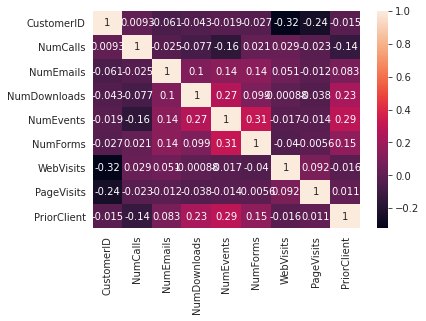

In [126]:
# to check correlation between different columns
sns.heatmap(train_df.corr(),annot=True)

In [127]:
ls=train_df.groupby('Country').size().nlargest(5).index.values
ls

array(['USA', 'Canada', 'Japan', 'France', 'China'], dtype=object)

In [128]:
def func(val):
  if val not in ls:
    return 'Others'
  return val

train_df['Country']=train_df['Country'].apply(func)


In [129]:
train_df.iloc[:,1:]

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient
0,33,19,1,0,1,German,Others,10.0,0.0,1
1,0,1,0,1,0,English,USA,61.0,0.0,0
2,4,6,2,0,0,Spanish,Others,1.0,0.0,0
3,0,10,0,0,1,English,Others,26.0,0.0,0
4,7,0,0,0,0,English,USA,11.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
748,3,0,0,0,0,German,Canada,0.0,0.0,0
749,0,4,0,0,0,German,Canada,0.0,0.0,0
750,15,0,0,0,0,English,Others,0.0,0.0,0
751,0,1,0,0,0,Spanish,Others,0.0,0.0,1


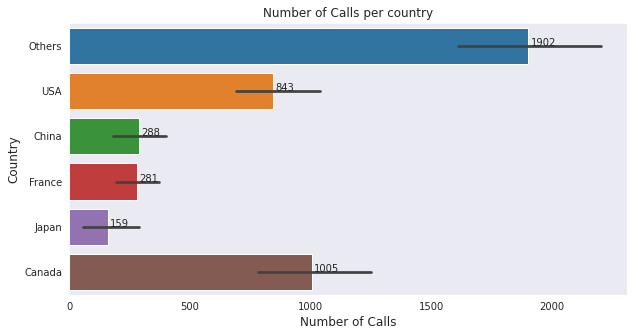

In [130]:
#plotting no of calls from each country
plt.figure(figsize=(10,5))

a = sns.barplot(x = 'NumCalls', y = 'Country', estimator = np.sum , data = train_df)
plt.title("Number of Calls per country")
plt.ylabel('Country', fontsize=12)
plt.xlabel('Number of Calls', fontsize=12)

for p in a.patches:
  val = p.get_width()
  x = p.get_x() + p.get_width() + 10
  y = p.get_y() + p.get_height()/2
  a.annotate(round(val,2),(x,y))

plt.show()

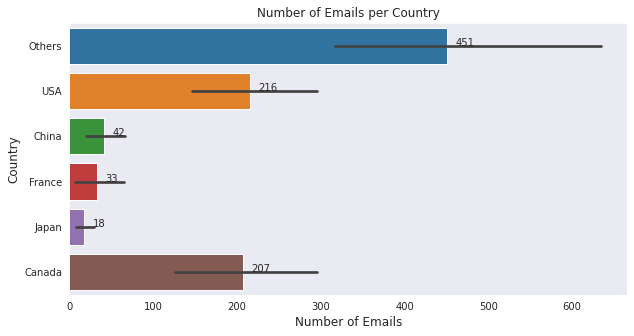

In [131]:
#plotting number of emails per country
plt.figure(figsize=(10,5))
a1=sns.barplot(x='NumEmails',y='Country',data=train_df, estimator=np.sum)
plt.title('Number of Emails per Country')
plt.xlabel('Number of Emails',fontsize=12)
plt.ylabel('Country',fontsize=12)

for p in a1.patches:
  val1=p.get_width()
  x1=p.get_x()+p.get_width()+10
  y1=p.get_y()+p.get_height()/2
  a1.annotate(round(val1,2),(x1,y1))

plt.show()


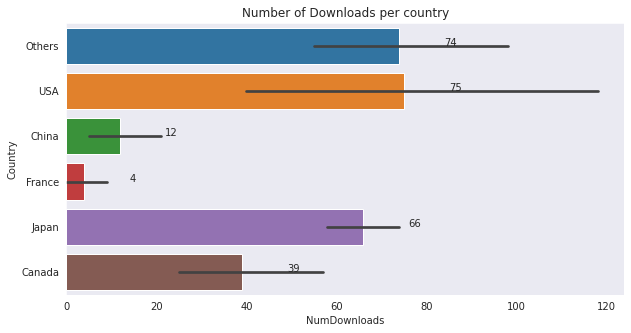

In [132]:
#plotting no of down from each country
plt.figure(figsize=(10,5))

a3 = sns.barplot(x = 'NumDownloads', y = 'Country', estimator = np.sum , data = train_df)
plt.title("Number of Downloads per country")

for p in a3.patches:
  val3 = p.get_width()
  x3 = p.get_x() + p.get_width() + 10
  y3 = p.get_y() + p.get_height()/2
  a3.annotate(round(val3,2),(x3,y3))

plt.show()

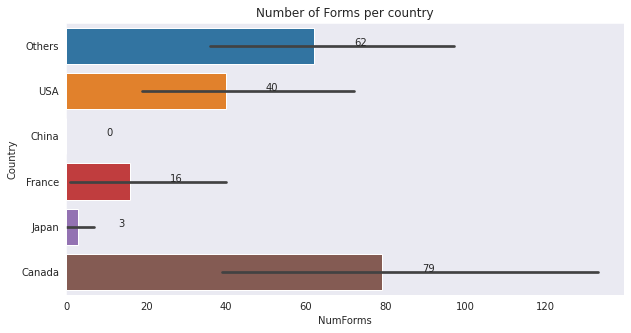

In [133]:
#plotting no of forms from each country
plt.figure(figsize=(10,5))

a4 = sns.barplot(x = 'NumForms', y = 'Country', estimator = np.sum , data = train_df)
plt.title("Number of Forms per country")


for p in a4.patches:
  val = p.get_width()
  x4 = p.get_x() + p.get_width() + 10
  y4 = p.get_y() + p.get_height()/2
  a4.annotate(round(val,2),(x4,y4))

plt.show()

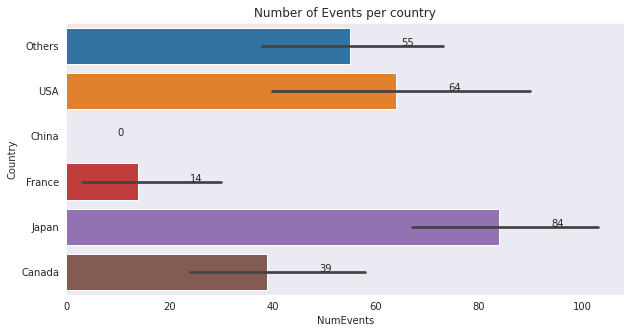

In [134]:
#plotting no of events from each country
plt.figure(figsize=(10,5))

a5 = sns.barplot(x = 'NumEvents', y = 'Country', estimator = np.sum , data = train_df)
plt.title("Number of Events per country")


for p in a5.patches:
  val = p.get_width()
  x5 = p.get_x() + p.get_width() + 10
  y5 = p.get_y() + p.get_height()/2
  a5.annotate(round(val,2),(x5,y5))

plt.show()

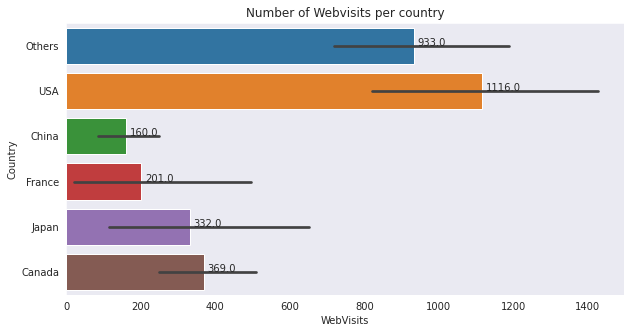

In [135]:
#plotting no of webvisits from each country
plt.figure(figsize=(10,5))

a6 = sns.barplot(x = 'WebVisits', y = 'Country', estimator = np.sum , data = train_df)
plt.title("Number of Webvisits per country")


for p in a6.patches:
  val = p.get_width()
  x6 = p.get_x() + p.get_width() + 10
  y6= p.get_y() + p.get_height()/2
  a6.annotate(round(val,2),(x6,y6))

plt.show()

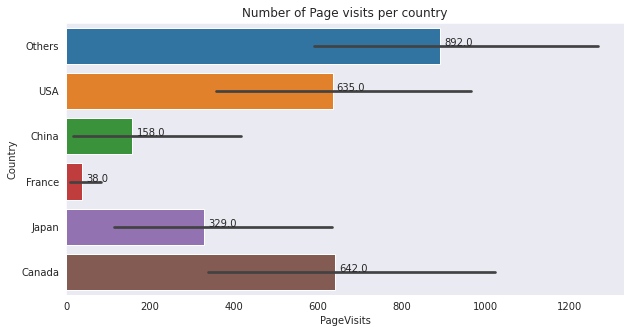

In [136]:
#plotting no of pgvisits from each country
plt.figure(figsize=(10,5))

a7 = sns.barplot(x = 'PageVisits', y = 'Country', estimator = np.sum , data = train_df)
plt.title("Number of Page visits per country")


for p in a7.patches:
  val = p.get_width()
  x7 = p.get_x() + p.get_width() + 10
  y7 = p.get_y() + p.get_height()/2
  a7.annotate(round(val,2),(x7,y7))

plt.show()

In [137]:
tot=train_df.groupby('Country')['PriorClient'].sum()
country=tot.index.to_list()
prior_clients=tot.to_list()
print (country,'\n',prior_clients,'\n',tot,'\n')

['Canada', 'China', 'France', 'Japan', 'Others', 'USA'] 
 [92, 30, 25, 69, 150, 117] 
 Country
Canada     92
China      30
France     25
Japan      69
Others    150
USA       117
Name: PriorClient, dtype: int64 



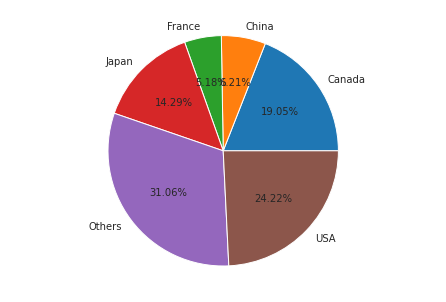

In [138]:
# no of prior clientsin each country who previously made a purchase
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(prior_clients, labels =country,autopct='%1.2f%%')
plt.show()


In [139]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Pie(labels=country, values=prior_clients)])
# fig.show()

In [140]:
# language of clients who made purchase 
mod=train_df.groupby('Language')['PriorClient'].sum()
lag=mod.index.to_list()
prior_clients_lang=mod.to_list()
print (lag,'\n',prior_clients_lang,'\n',mod,'\n')

['Arabic', 'Chinese', 'Chinese trad.', 'Czech', 'Dutch', 'English', 'Finnish', 'French', 'German', 'Hungarian', 'Italian', 'Japanese', 'Korean', 'Norwegian', 'Portuguese', 'Russian', 'Spanish', 'Turkish'] 
 [0, 24, 3, 3, 6, 255, 0, 3, 57, 3, 9, 69, 3, 0, 12, 3, 33, 0] 
 Language
Arabic             0
Chinese           24
Chinese trad.      3
Czech              3
Dutch              6
English          255
Finnish            0
French             3
German            57
Hungarian          3
Italian            9
Japanese          69
Korean             3
Norwegian          0
Portuguese        12
Russian            3
Spanish           33
Turkish            0
Name: PriorClient, dtype: int64 



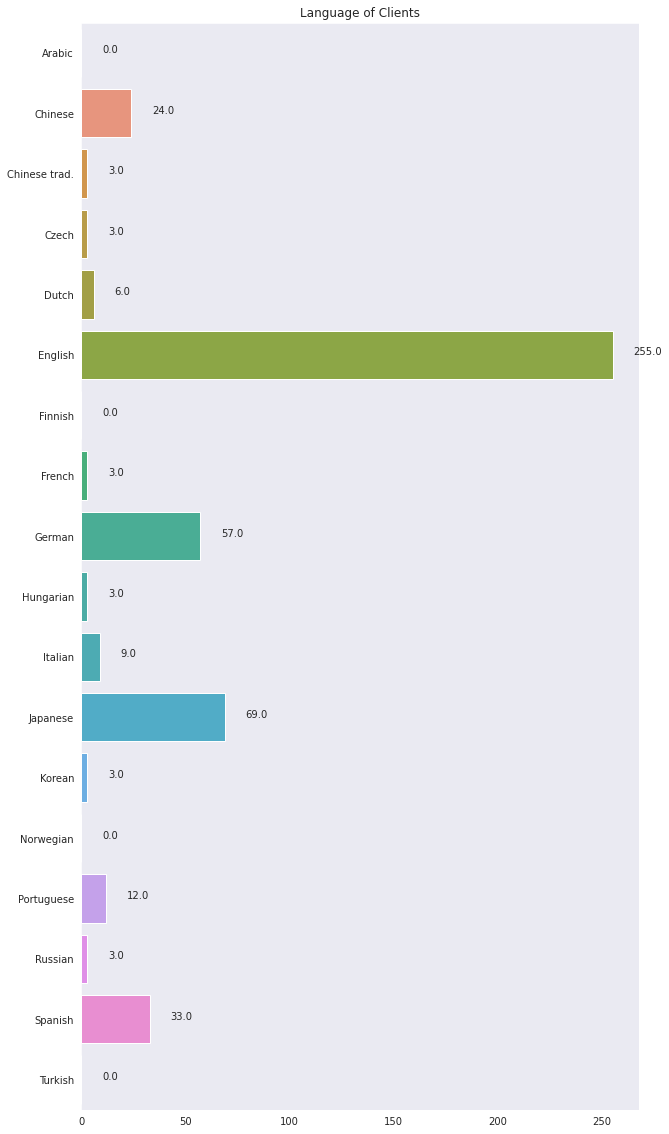

In [141]:
# no of prior clients in diff languages who previously made a purchase

plt.figure(figsize=(10,20))

a8=sns.barplot(prior_clients_lang,lag)
plt.title("Language of Clients")


for p in a8.patches:
  val = p.get_width()
  x8 = p.get_x() + p.get_width() + 10
  y8= p.get_y() + p.get_height()/2
  a8.annotate(round(val,2),(x8,y8))

plt.show()

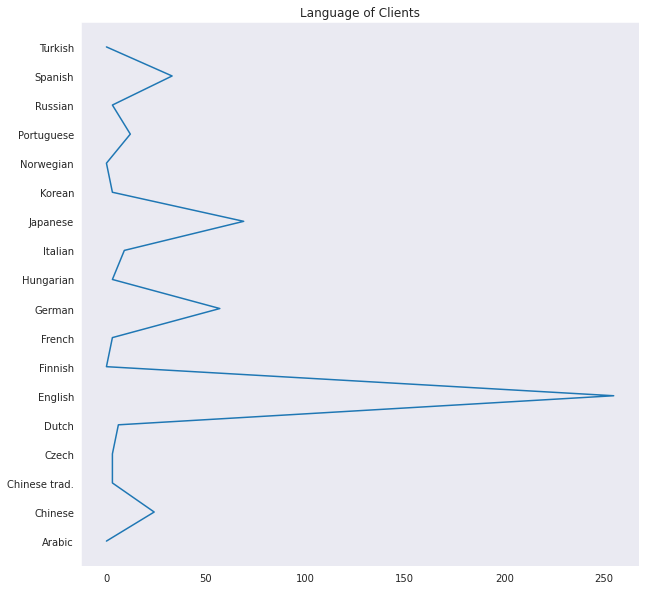

In [142]:
plt.figure(figsize=(10,10))

plt.plot(prior_clients_lang,lag)
plt.title("Language of Clients")
plt.show()

In [143]:
col=['NumCalls',    'NumEmails', 'NumDownloads',
          'NumEvents',     'NumForms',   'WebVisits',   'PageVisits' ]
def func(data):
  val=data[col].sum()
  return val
  
train_df['Total_contribution']=train_df.apply(func,axis=1)

In [144]:
train_df

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,Total_contribution
0,1,33,19,1,0,1,German,Others,10.0,0.0,1,64.0
1,2,0,1,0,1,0,English,USA,61.0,0.0,0,63.0
2,3,4,6,2,0,0,Spanish,Others,1.0,0.0,0,13.0
3,4,0,10,0,0,1,English,Others,26.0,0.0,0,37.0
4,5,7,0,0,0,0,English,USA,11.0,0.0,0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,German,Canada,0.0,0.0,0,3.0
749,750,0,4,0,0,0,German,Canada,0.0,0.0,0,4.0
750,751,15,0,0,0,0,English,Others,0.0,0.0,0,15.0
751,752,0,1,0,0,0,Spanish,Others,0.0,0.0,1,1.0


In [145]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
train_df['Country']=le.fit_transform(train_df['Country'])
train_df['Language']=le.fit_transform(train_df['Language'])


In [146]:
# creating instance of one-hot-encoder
one = OneHotEncoder(handle_unknown='ignore')
one_df = pd.DataFrame(one.fit_transform(train_df[['Country']]).toarray())
# merge with 
train_df = train_df.join(one_df)
train_df.columns


Index([        'CustomerID',           'NumCalls',          'NumEmails',
             'NumDownloads',          'NumEvents',           'NumForms',
                 'Language',            'Country',          'WebVisits',
               'PageVisits',        'PriorClient', 'Total_contribution',
                          0,                    1,                    2,
                          3,                    4,                    5],
      dtype='object')

In [147]:
train_df.columns=[  'CustomerID',     'NumCalls',    'NumEmails', 'NumDownloads',
          'NumEvents',     'NumForms',     'Language',            'Country',
          'WebVisits',   'PageVisits',  'PriorClient',       'Total_contribution',       'Country0',
                    'Country1',              'Country2',              'Country3',      'Country4',
                    'Country5']


In [148]:
train_df=train_df.drop(columns=['Country','CustomerID','NumEvents','NumForms'])

In [149]:
train_df

,NumCalls,NumEmails,NumDownloads,Language,WebVisits,PageVisits,PriorClient,Total_contribution,Country0,Country1,Country2,Country3,Country4,Country5
0,33,19,1,8,10.0,0.0,1,64.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0,5,61.0,0.0,0,63.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,6,2,16,1.0,0.0,0,13.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,10,0,5,26.0,0.0,0,37.0,0.0,0.0,0.0,0.0,1.0,0.0
4,7,0,0,5,11.0,0.0,0,18.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,3,0,0,8,0.0,0.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
749,0,4,0,8,0.0,0.0,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
750,15,0,0,5,0.0,0.0,0,15.0,0.0,0.0,0.0,0.0,1.0,0.0
751,0,1,0,16,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [150]:
col=train_df.columns.to_list()

In [151]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df))
train_df.columns=col
train_df

,NumCalls,NumEmails,NumDownloads,Language,WebVisits,PageVisits,PriorClient,Total_contribution,Country0,Country1,Country2,Country3,Country4,Country5
0,0.600000,0.463415,0.090909,0.470588,0.075188,0.0,1.0,0.347826,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.024390,0.000000,0.294118,0.458647,0.0,0.0,0.342391,0.0,0.0,0.0,0.0,0.0,1.0
2,0.072727,0.146341,0.181818,0.941176,0.007519,0.0,0.0,0.070652,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.243902,0.000000,0.294118,0.195489,0.0,0.0,0.201087,0.0,0.0,0.0,0.0,1.0,0.0
4,0.127273,0.000000,0.000000,0.294118,0.082707,0.0,0.0,0.097826,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0.054545,0.000000,0.000000,0.470588,0.000000,0.0,0.0,0.016304,1.0,0.0,0.0,0.0,0.0,0.0
749,0.000000,0.097561,0.000000,0.470588,0.000000,0.0,0.0,0.021739,1.0,0.0,0.0,0.0,0.0,0.0
750,0.272727,0.000000,0.000000,0.294118,0.000000,0.0,0.0,0.081522,0.0,0.0,0.0,0.0,1.0,0.0
751,0.000000,0.024390,0.000000,0.941176,0.000000,0.0,1.0,0.005435,0.0,0.0,0.0,0.0,1.0,0.0


In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_df,test_df,test_size=0.2,random_state=0)

In [153]:
y_train

181    1
354    1
252    1
97     1
521    0
      ..
707    0
192    1
629    1
559    1
684    1
Name: MadeAPurchase, Length: 602, dtype: int64

In [154]:
x_train

,NumCalls,NumEmails,NumDownloads,Language,WebVisits,PageVisits,PriorClient,Total_contribution,Country0,Country1,Country2,Country3,Country4,Country5
181,0.200000,0.02439,0.000000,0.294118,0.127820,0.000000,1.0,0.163043,0.0,0.0,0.0,0.0,0.0,1.0
354,0.000000,0.02439,0.000000,0.294118,0.030075,0.000000,1.0,0.032609,1.0,0.0,0.0,0.0,0.0,0.0
252,0.000000,0.02439,0.000000,0.294118,0.045113,0.000000,0.0,0.038043,0.0,0.0,0.0,0.0,0.0,1.0
97,0.090909,0.00000,0.000000,0.470588,0.187970,0.000000,0.0,0.163043,1.0,0.0,0.0,0.0,0.0,0.0
521,0.000000,0.00000,0.000000,0.294118,0.007519,0.000000,1.0,0.016304,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.163636,0.00000,0.000000,0.705882,0.022556,0.000000,0.0,0.065217,0.0,0.0,1.0,0.0,0.0,0.0
192,0.400000,0.00000,0.000000,0.470588,0.127820,0.162393,1.0,0.315217,1.0,0.0,0.0,0.0,0.0,0.0
629,0.181818,0.00000,0.000000,0.352941,0.000000,0.000000,0.0,0.054348,0.0,0.0,0.0,0.0,1.0,0.0
559,0.436364,0.00000,0.181818,0.588235,0.000000,0.017094,1.0,0.163043,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
x_train.shape

(602, 14)

In [156]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, kernel_initializer='normal',activation='relu',input_dim=14))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=4,kernel_initializer='normal', activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='normal',activation='sigmoid'))


In [157]:
# compiling network
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [158]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 90        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [159]:
hist=ann.fit(x_train, y_train, validation_split=0.15, batch_size = 32, epochs = 10)


Epoch 1/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.6654 - val_loss: 0.6883 - val_accuracy: 0.7802
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.6751 - val_loss: 0.6829 - val_accuracy: 0.7802
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.6751 - val_loss: 0.6767 - val_accuracy: 0.7802
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.6751 - val_loss: 0.6689 - val_accuracy: 0.7802
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.6751 - val_loss: 0.6595 - val_accuracy: 0.7802
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6751 - val_loss: 0.6488 - val_accuracy: 0.7802
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6751 - val_loss: 0.6347 - val_accuracy: 0.7802
Epoch 8/10
16/16 [==

In [160]:
y_pred=ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0 58]
 [ 0 93]]


0.6158940397350994

#Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier


In [163]:

randomForestFinalModel = RandomForestClassifier(max_depth = 7,max_leaf_nodes=30, max_features = 'auto', n_estimators = 200,criterion='entropy')


In [164]:
randomForestFinalModel.fit(x_train, y_train)
pred2 = randomForestFinalModel.predict(x_test)
pred2

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, pred2)
print(cm1)
accuracy_score(y_test, pred2)

[[32 26]
 [ 2 91]]


0.8145695364238411

# Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
y_pred2 = classifier.predict(x_test)

In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[18 40]
 [ 3 90]]


0.7152317880794702